# In this kaggle competition, we will try to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. 

# Import Dependancies

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Exploratory data analysis (EDA)

In [19]:
df = pd.read_csv('train.csv')

In [20]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


The describe function provides summary statistics of numerical columns

In [21]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The info function provides a concise summary of the dataframe including the non-null count for each feature.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


The isnull funciton is to know exactly how many data is missing for each feature.

In [23]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Data visualization

See the data distribution.

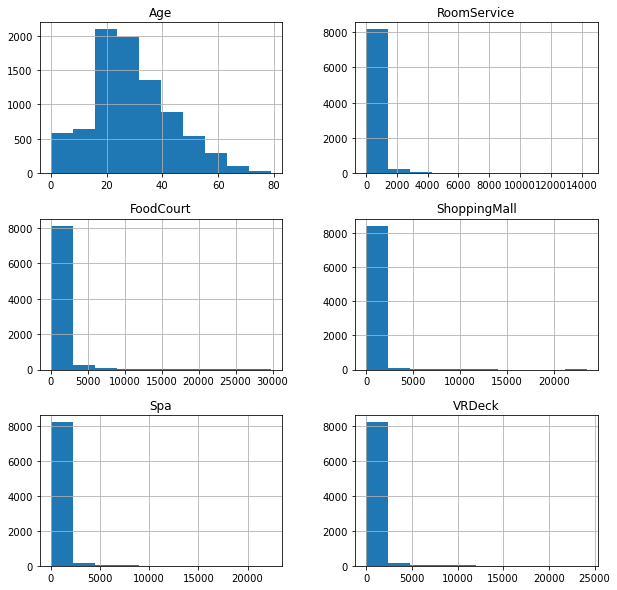

In [24]:
df.hist(figsize=(10, 10))
plt.show()

Define correlations between the features available

In [25]:
correlation_matrix = df.corr()
correlation_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


Display the correlation matrix in a better form visually.
<br>
From the map displayed below, we see that RoomService, Spa and VRDeck correlate with the target variable.

<AxesSubplot:>

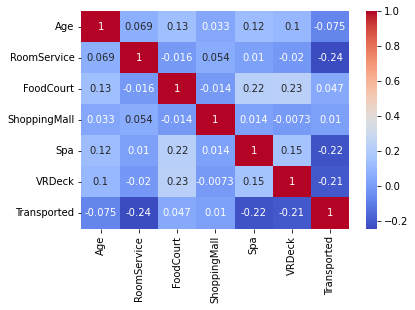

In [26]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Define correlations between categorical features using Cramer's V correlation.

In [27]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_corr = cramers_v(df['CryoSleep'], df['Transported'])
print("Cramér's V correlation:", cramer_corr)

Cramér's V correlation: 0.46830046337435893


Looks like the CryoSleep feature is having a relation with the target variable.

# Data preprocessing

First, I would like to categorize my dataset into categorical and numerical features.

In [28]:
numerical_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']
categorical_features = ['HomePlanet', 'Destination', 'CryoSleep', 'Cabin', 'VIP']

Impute the missing values of some categorical features using the Mode.

In [50]:
class Imputer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    
    def transform(self,x):
        imputer = SimpleImputer(strategy="most_frequent")
        x['Age'] = imputer.fit_transform(x[['Age']])
        x['Cabin'] = imputer.fit_transform(x[['Cabin']])
        x['VIP'] = imputer.fit_transform(x[['VIP']])
        x['HomePlanet'] = imputer.fit_transform(x[['HomePlanet']])
        x['Destination'] = imputer.fit_transform(x[['Destination']])
        x['CryoSleep'] = imputer.fit_transform(x[['CryoSleep']])


        return x

Impute missing values for the numerical features using the median.

In [51]:
class NumImputer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    
    def transform(self,x):
        imputer = SimpleImputer(strategy="median")
        x['RoomService'] = imputer.fit_transform(x[['RoomService']])
        x['FoodCourt'] = imputer.fit_transform(x[['FoodCourt']])
        x['ShoppingMall'] = imputer.fit_transform(x[['ShoppingMall']])
        x['Spa'] = imputer.fit_transform(x[['Spa']])
        x['VRDeck'] = imputer.fit_transform(x[['VRDeck']])
        return x

Label encode the categorical features to make it easier for the model.

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        label_encoder = LabelEncoder()
        
        # Encode 'CryoSleep'
        X['CryoSleep_encoded'] = label_encoder.fit_transform(X['CryoSleep'])
        
        # Encode 'HomePlanet'
        X['HomePlanet_encoded'] = label_encoder.fit_transform(X['HomePlanet'])
        
        # Encode 'Destination'
        X['Destination_encoded'] = label_encoder.fit_transform(X['Destination'])
        
        #Encode 'Cabin'
        X['Cabin_encoded'] = label_encoder.fit_transform(X['Cabin'])

        
        return X


Drop the unnecessary features.
<br> 
I dropped the HomePlanet, Destination and CryoSleep as I already created an encoded column for them above.

In [80]:
class FeatureDropper(BaseEstimator, TransformerMixin):
     def fit(self, x, y=None):
        return self
    
     def transform(self, x):
        return x.drop(["Name", "ID", "HomePlanet", "Destination", "CryoSleep", "Cabin"], axis=1, errors="ignore")

Encapsulate all of the preprocessing steps in one pipeline.
<br>
This makes data preprocessing for any other dataset easier.

In [81]:
pipeline = Pipeline([("Imputer",Imputer()),
                     ("NumImputer",NumImputer()),
                     ("FeatureEncoder",FeatureEncoder()),
                    ("FeatureDropper",FeatureDropper())])

Transform the data using the pipeline.

In [82]:
new_data = pipeline.fit_transform(df)

In [83]:
new_data.isnull().sum()

PassengerId            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Transported            0
CryoSleep_encoded      0
HomePlanet_encoded     0
Destination_encoded    0
Cabin_encoded          0
dtype: int64

In [84]:
new_data

,PassengerId,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_encoded,HomePlanet_encoded,Destination_encoded,Cabin_encoded
0,0001_01,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,2,149
1,0002_01,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,2,2184
2,0003_01,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,2,1
3,0003_02,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,2,1
4,0004_01,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,2,2186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,1,0,146
8689,9278_01,18.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,1,5280
8690,9279_01,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,2,5285
8691,9280_01,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,0,1,0,2131


# Model training

Extract the target variable from the dataset.

In [86]:
X = new_data.drop(['Transported'],axis=1)
Y = new_data['Transported']

Split the training set into 80%-20%.

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Use the random_forest algorithm for classification.

In [88]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [89]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_pred = random_forest.predict(X_test)

# Testing

In [93]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7912593444508338


In [94]:
test_data = pd.read_csv('test.csv')

Apply the pipeline to this new dataset.

In [95]:
final_test_data = pipeline.fit_transform(test_data)

In [112]:
final_test_data.isnull().sum()

PassengerId            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
CryoSleep_encoded      0
HomePlanet_encoded     0
Destination_encoded    0
Cabin_encoded          0
dtype: int64

In [113]:
predictions = random_forest.predict(final_test_data)

In [111]:
predictions

array([1, 0, 1, ..., 1, 1, 1])

In [114]:
final_df = pd.DataFrame(test_data['PassengerId'])
final_df['Transported'] = predictions
final_df.to_csv('predictions.csv', index=False)

In [115]:
final_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
